In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [2]:
df = pd.read_csv("Assignment2 (letter_recognition).data")

In [4]:
X = df.iloc[:, 1 : 17]
Y = df.select_dtypes(include = [object])

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

f:\BE_Project\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               8704      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 26)                6682      
                                                                 
Total params: 146714 (573.10 KB)
Trainable params: 146714 (573.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20


113/113 [==============================] - 4s 9ms/step - loss: 3.2242 - accuracy: 0.0876 - val_loss: 3.1178 - val_accuracy: 0.1887
Epoch 2/20
113/113 [==============================] - 1s 6ms/step - loss: 2.7862 - accuracy: 0.2076 - val_loss: 2.3959 - val_accuracy: 0.3381
Epoch 3/20
113/113 [==============================] - 1s 4ms/step - loss: 2.2887 - accuracy: 0.3047 - val_loss: 2.0524 - val_accuracy: 0.4281
Epoch 4/20
113/113 [==============================] - 1s 5ms/step - loss: 2.0541 - accuracy: 0.3673 - val_loss: 1.8458 - val_accuracy: 0.4656
Epoch 5/20
113/113 [==============================] - 1s 5ms/step - loss: 1.8942 - accuracy: 0.4128 - val_loss: 1.7089 - val_accuracy: 0.5138
Epoch 6/20
113/113 [==============================] - 1s 6ms/step - loss: 1.7700 - accuracy: 0.4468 - val_loss: 1.5954 - val_accuracy: 0.5337
Epoch 7/20
113/113 [==============================] - 1s 6ms/step - loss: 1.6722 - accuracy: 0.4779 - val_loss: 1.5108 - val_accuracy: 0.5594
Epoc

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0328969955444336
Test accuracy: 0.6952499747276306


<Axes: title={'center': 'Accuracy Curves'}, xlabel='Epochs', ylabel='Accuracy'>

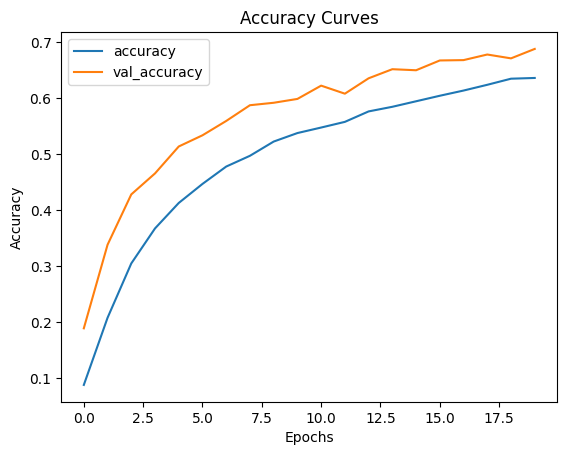

In [13]:
pd.DataFrame(history.history).plot(y=['accuracy', 'val_accuracy'], xlabel="Epochs", ylabel="Accuracy", title="Accuracy Curves")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Load the dataset from CSV file
df = pd.read_csv('letter_dataset.csv')

# Extract features (pixel values) and labels
X = df.drop('label', axis=1)  # Assuming 'label' is the column name for the target variable
y = df['label']

# Encode labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values (assuming pixel values are between 0 and 255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])